In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.model_selection import train_test_split

from convexmtl_torch.model.ConvexTorchCombinator import ConvexTorchCombinator
from convexmtl_torch.model.GraphLaplacianTorchCombinator import GraphLaplacianTorchCombinator
from convexmtl_torch.model.utils import NeuralNetwork

from convexmtl_torch.data.MTLSyntheticDataset import MTLClustersARegression

import torch
from torch.nn import MSELoss
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer

from icecream import ic

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from copy import copy


In [2]:
max_epochs=200

In [3]:
mtlds = MTLClustersARegression(n_samples_per_task=100)

X, y = mtlds.X, mtlds.y

if y.ndim < 2:
    y = y[:, None]

ic| tasks: [0, 1, 10, 11, 12, 13, 20, 21, 22, 23]
ic| colors: {0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
             1: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
             10: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
             11: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
             12: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
             13: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
             20: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
             21: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
             22: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
             23: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)}
ic| X_data.shape: (1000, 1)


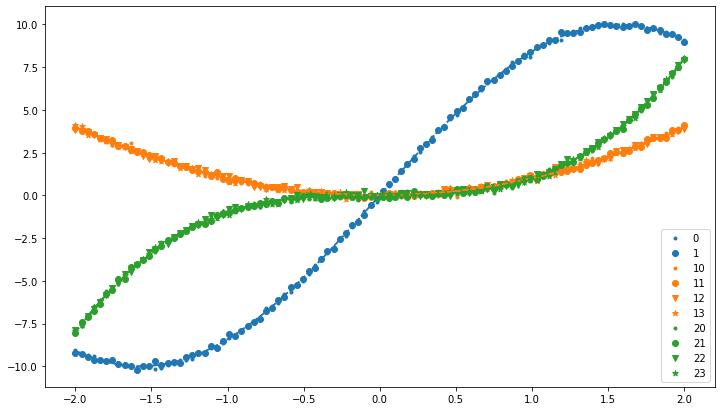

In [4]:
mtlds.plot_data_functions(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_test_numpy = copy(X_test)

In [6]:
X_train, t_train = X_train[:,:-1], X_train[:,-1]
X_test, t_test = X_test[:,:-1], X_test[:,-1]
X_train, t_train, y_train = map(torch.tensor, (X_train, t_train, y_train))
X_train, t_train, y_train = map(lambda obj: obj.float(), [X_train, t_train, y_train])
X_test, t_test, y_test = map(torch.tensor, (X_test, t_test, y_test))
X_test, t_test, y_test = map(lambda obj: obj.float(), [X_test, t_test, y_test])


In [28]:
tasks = np.unique(t_train)
n_tasks = len(tasks)

In [29]:
# train_ds = TensorDataset(X_train, t_train, y_train)
train_ds = TensorDataset(X_train, t_train, y_train)

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)



## ConvexMTL Torch

In [30]:
model = ConvexTorchCombinator(n_features=1, n_output=1, n_channel=1, tasks=tasks, specific_lambda=True)
# model = NeuralNetwork(n_features=1)

In [31]:
trainer = Trainer(max_epochs=max_epochs)

trainer.fit(model, train_dl)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
ic| param_list: ParameterList(
                    (0): Parameter containing: [torch.float32 of size 64x1]
                    (1): Parameter containing: [torch.float32 of size 64]
                    (2): Parameter containing: [torch.float32 of size 64x64]
                    (3): Parameter containing: [torch.float32 of size 64]
                    (4): Parameter containing: [torch.float32 of size 64x64]
                    (5): Parameter containing: [torch.float32 of size 64]
                    (6): Parameter containing: [torch.float32 of size 1x64]
                    (7): Parameter containing: [torch.float32 of size 1]
                )
ic| param_list: ParameterList(
                    (0): Parameter containing: [torch.float32 of size 64x1]
                    (1): Parameter containing: [torch.float32 of size 64]
                    (2

Epoch 199: 100%|██████████| 21/21 [00:00<00:00, 38.39it/s, loss=0.0203, v_num=124]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 21/21 [00:00<00:00, 36.86it/s, loss=0.0203, v_num=124]


In [32]:
# pred = model(X_test, t_test)
pred = model(X_test, t_test)

In [33]:
pred_numpy = pred.detach().numpy()
pred_numpy.shape

(330, 1)

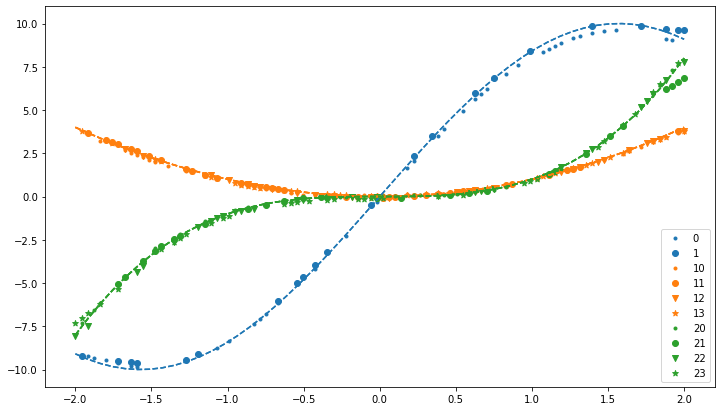

In [34]:
mtlds.plot_data_functions(X_test_numpy, pred_numpy)

In [35]:
model.get_lamb()

ic| self.lamb_dic: {0.0: Parameter containing:
                   tensor([-0.1002], requires_grad=True),
                    1.0: Parameter containing:
                   tensor([-0.0668], requires_grad=True),
                    10.0: Parameter containing:
                   tensor([-0.0256], requires_grad=True),
                    11.0: Parameter containing:
                   tensor([-0.0776], requires_grad=True),
                    12.0: Parameter containing:
                   tensor([-0.0750], requires_grad=True),
                    13.0: Parameter containing:
                   tensor([-0.0795], requires_grad=True),
                    20.0: Parameter containing:
                   tensor([-0.0610], requires_grad=True),
                    21.0: Parameter containing:
                   tensor([-0.0836], requires_grad=True),
                    22.0: Parameter containing:
                   tensor([-0.0478], requires_grad=True),
                    23.0: Parameter containing:


{0.0: array([0.4749607], dtype=float32),
 1.0: array([0.48331296], dtype=float32),
 10.0: array([0.49360758], dtype=float32),
 11.0: array([0.48061886], dtype=float32),
 12.0: array([0.48126948], dtype=float32),
 13.0: array([0.48013106], dtype=float32),
 20.0: array([0.4847572], dtype=float32),
 21.0: array([0.47912392], dtype=float32),
 22.0: array([0.48804924], dtype=float32),
 23.0: array([0.49573925], dtype=float32)}

## GraphLaplacian Torch

In [36]:
model = GraphLaplacianTorchCombinator(n_features=1, n_output=1, n_channel=1, tasks=tasks, nu=0.01)
# model = NeuralNetwork(n_features=1)

In [37]:
trainer = Trainer(max_epochs=max_epochs)

trainer.fit(model, train_dl)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
ic| param_list: ParameterList(
                    (0): Parameter containing: [torch.float32 of size 64x1]
                    (1): Parameter containing: [torch.float32 of size 64]
                    (2): Parameter containing: [torch.float32 of size 64x64]
                    (3): Parameter containing: [torch.float32 of size 64]
                    (4): Parameter containing: [torch.float32 of size 64x64]
                    (5): Parameter containing: [torch.float32 of size 64]
                )
ic| param_list: ParameterList(
                    (0): Parameter containing: [torch.float32 of size 64x1]
                    (1): Parameter containing: [torch.float32 of size 64]
                    (2): Parameter containing: [torch.float32 of size 64x64]
                    (3): Parameter containing: [torch.float32 of size 64]
                    

Epoch 199: 100%|██████████| 21/21 [00:01<00:00, 14.27it/s, loss=0.03, v_num=125]  

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 21/21 [00:01<00:00, 14.02it/s, loss=0.03, v_num=125]


In [38]:
# pred = model(X_test, t_test)
pred = model(X_test, t_test)

In [39]:
pred_numpy = pred.detach().numpy()
pred_numpy.shape

(330, 1)

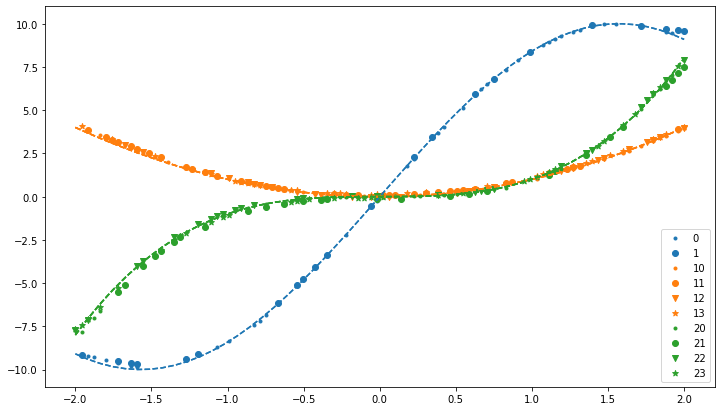

In [40]:
mtlds.plot_data_functions(X_test_numpy, pred_numpy)

In [46]:
adjMatrix = model.get_adjMatrix()

ic| adjMatrix_: array([[0.5       , 0.04283115, 0.02816544, 0.02749623, 0.02858692,
                        0.02935727, 0.0229512 , 0.02381389, 0.02298469, 0.02469013],
                       [0.04297657, 0.5       , 0.02975505, 0.03040436, 0.0290172 ,
                        0.02905528, 0.02312028, 0.02430658, 0.02341618, 0.02324252],
                       [0.03177029, 0.03347436, 0.5       , 0.08580241, 0.09657689,
                        0.11462084, 0.03380762, 0.03457897, 0.03279761, 0.03637563],
                       [0.03112924, 0.03433501, 0.08602038, 0.5       , 0.1049138 ,
                        0.10921572, 0.03712804, 0.03585948, 0.0344712 , 0.03706332],
                       [0.03247294, 0.03284926, 0.09719578, 0.10536117, 0.5       ,
                        0.10527387, 0.0346539 , 0.03826289, 0.03111824, 0.03373588],
                       [0.03368114, 0.03322776, 0.11611117, 0.11048074, 0.10612866,
                        0.5       , 0.0348991 , 0.03720275, 0.03458013,

<AxesSubplot:>

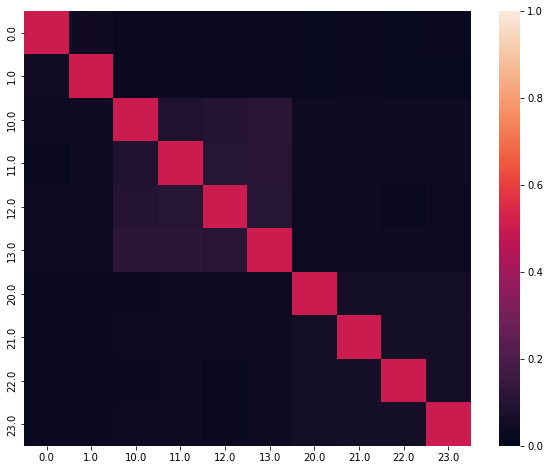

In [52]:
import seaborn as sns

plt.figure(figsize=(10, 8))
ax = plt.gca()
sns.heatmap(adjMatrix, xticklabels=tasks, yticklabels=tasks, vmin=0, vmax=1, ax=ax)